<a href="https://colab.research.google.com/github/shrestha94sujan/stocks/blob/master/stock_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
print('welcome to stock prediction Using Simple Linear Regression!')


welcome to stock prediction Using Simple Linear Regression!


In [0]:
!pip install yfinance

### **Using yfinance library to import the history stock data**

In [372]:
import yfinance as yf
import pandas as pd

pd.options.display.max_rows=None

aapl = yf.Ticker('AAPL')

historical_data = aapl.history(period='30y')
historical_data.reset_index(inplace=True)

df = historical_data.copy()

df['PCD'] = df['Close'] - df['Open']

df.dropna(inplace=True)

print(df.head(10))
# Size of the dataframe
print('Dataframe size: {}'.format(df.shape[0]))

         Date  Open  High   Low  ...      Volume  Dividends  Stock Splits   PCD
1  1990-05-22  1.17  1.21  1.16  ...  75272400.0        0.0           0.0  0.03
2  1990-05-23  1.20  1.23  1.20  ...  51878400.0        0.0           0.0  0.02
3  1990-05-24  1.23  1.23  1.21  ...  37032800.0        0.0           0.0 -0.01
4  1990-05-25  1.15  1.18  1.13  ...  80830400.0        0.0           0.0  0.01
5  1990-05-29  1.16  1.20  1.14  ...  60802000.0        0.0           0.0  0.03
6  1990-05-30  1.21  1.21  1.20  ...  69204800.0        0.0           0.0 -0.01
7  1990-05-31  1.21  1.21  1.19  ...  25771200.0        0.0           0.0 -0.01
8  1990-06-01  1.20  1.22  1.18  ...  39309200.0        0.0           0.0 -0.02
9  1990-06-04  1.18  1.19  1.16  ...  44856000.0        0.0           0.0  0.00
10 1990-06-05  1.19  1.19  1.13  ...  74858000.0        0.0           0.0 -0.04

[10 rows x 9 columns]
Dataframe size: 7559


### **Adding a few import statements.**

In [0]:
from sklearn import preprocessing
import numpy as np
import math
import seaborn as sns; sns.set()

### **Feature Selection**

**Splitting the data into training and test dataset**


In [374]:
# We need standardize our dataset

X = df[['Open', 'PCD', 'Volume', 'Dividends', 'Stock Splits']]
y = df[['Close']]

starting_point = int(math.ceil(.8 * len(df)))
print(starting_point)

X_train = X[:starting_point].values
y_train = y[:starting_point].values

X_test = X[starting_point:].values
y_test = y[starting_point:].values

6048


### **A few more import statements**

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.compose import TransformedTargetRegressor 
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

### **LinearRegression:**

Using the linearRegression classifier to predict the intercept and coefficients to be used for predicting the y values. i.e. y = mx + c.

In [376]:
regr = TransformedTargetRegressor(regressor=LinearRegression(), transformer=MinMaxScaler())
regr.fit(X_train, y_train)

accuracy = regr.score(X_test, y_test)

print('Accuracy: {}%\n'.format(accuracy * 100))
y_predicted = regr.predict(X_test)

new_df = pd.DataFrame({'Actual closing price': y_test.flatten(), 'Predicted': y_predicted.flatten()})
print(new_df.head(25))

Accuracy: 100.0%

    Actual closing price  Predicted
0                  78.57      78.57
1                  79.46      79.46
2                  80.95      80.95
3                  80.74      80.74
4                  82.21      82.21
5                  81.90      81.90
6                  81.34      81.34
7                  82.49      82.49
8                  83.43      83.43
9                  83.76      83.76
10                 83.53      83.53
11                 84.87      84.87
12                 85.36      85.36
13                 85.01      85.01
14                 83.59      83.59
15                 82.67      82.67
16                 83.51      83.51
17                 83.40      83.40
18                 83.49      83.49
19                 83.20      83.20
20                 82.34      82.34
21                 82.27      82.27
22                 81.77      81.77
23                 81.84      81.84
24                 82.33      82.33


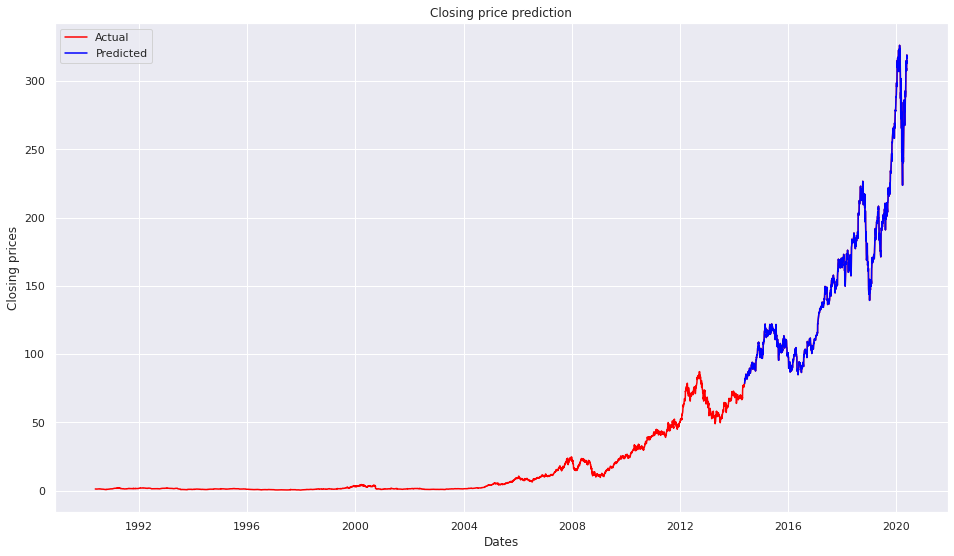

In [377]:
#Plotting the diagram

plt.figure(figsize=(16, 9))
plt.plot(df['Date'], df['Close'], c='red', label='Actual')
plt.plot(df['Date'].iloc[6048:], y_predicted.flatten(), c='blue', label='Predicted')
plt.xlabel('Dates')
plt.ylabel('Closing prices')
plt.title('Closing price prediction')
plt.legend()
plt.show()

Observation:

Our linear regression model did predict the rise and fall of the closing prices very accurately.